In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('E:\mohamed gomaa\Trianing\sales_viz\superstore_final_dataset (1).csv',encoding='ISO-8859–1')
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


Data preprocessing and Cleaning 


In [3]:
data.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [4]:
# unwanted columns :) 
unwanted_columns = ['Row_ID','Order_ID','Customer_ID','Customer_Name','Postal_Code','Product_ID']

In [5]:
# drop unwanted columns :) 
data.drop(unwanted_columns,axis=1,inplace=True)
data.head(3)

,Order_Date,Ship_Date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Product_Name,Sales
0,8/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,8/11/2017,11/11/2017,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,12/6/2017,16/06/2017,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [6]:
data.describe()
# it is normal to be varianced in sales price :) 

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_Date    9800 non-null   object 
 1   Ship_Date     9800 non-null   object 
 2   Ship_Mode     9800 non-null   object 
 3   Segment       9800 non-null   object 
 4   Country       9800 non-null   object 
 5   City          9800 non-null   object 
 6   State         9800 non-null   object 
 7   Region        9800 non-null   object 
 8   Category      9800 non-null   object 
 9   Sub_Category  9800 non-null   object 
 10  Product_Name  9800 non-null   object 
 11  Sales         9800 non-null   float64
dtypes: float64(1), object(11)
memory usage: 918.9+ KB


In [8]:
# Conovert Order_Date & Ship_Date into datetime :) 
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
data['Ship_Date'] = pd.to_datetime(data['Ship_Date'])

c:\Users\NOUR\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\NOUR\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\NOUR\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\NOUR\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specify in

In [9]:
# chech missing data 
data.isna().any()

Order_Date      False
Ship_Date       False
Ship_Mode       False
Segment         False
Country         False
City            False
State           False
Region          False
Category        False
Sub_Category    False
Product_Name    False
Sales           False
dtype: bool

In [10]:
# there are no duplicates in dataset even if there are found it is normal :) 
data.duplicated().all()

False

Analysis 

In [11]:
data.head(3)

,Order_Date,Ship_Date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Product_Name,Sales
0,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-08-11,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,2017-12-06,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [12]:
# top 10 Selling Products in USA 
top_10_Salling_product = data.groupby('Product_Name')['Sales'].sum().nlargest(10).reset_index()
top_10_Salling_product.head()

,Product_Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479


In [13]:
# Count Each Shape Mode 
data['Ship_Mode'].value_counts().sort_values()

Same Day           538
First Class       1501
Second Class      1902
Standard Class    5859
Name: Ship_Mode, dtype: int64

In [14]:
# Top 10 state sales and get the most sales product 
top_10_state_and_most_sales_product = data.groupby(['State','Product_Name'])['Sales'].sum().nlargest(10).reset_index()
top_10_state_and_most_sales_product

,State,Product_Name,Sales
0,Florida,Cisco TelePresence System EX90 Videoconferenci...,22638.480
1,Indiana,Canon imageCLASS 2200 Advanced Copier,17499.950
2,Washington,Canon imageCLASS 2200 Advanced Copier,13999.960
3,California,High Speed Automatic Electric Letter Opener,13100.240
4,Texas,Lexmark MX611dhe Monochrome Laser Printer,11219.934
5,New York,Canon imageCLASS 2200 Advanced Copier,11199.968
6,Delaware,Canon imageCLASS 2200 Advanced Copier,10499.970
7,Michigan,GBC Ibimaster 500 Manual ProClick Binding System,9892.740
8,Minnesota,Ibico EPK-21 Electric Binding System,9449.950
9,New Jersey,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930


Visualiztion

<AxesSubplot:xlabel='Category', ylabel='Sales'>

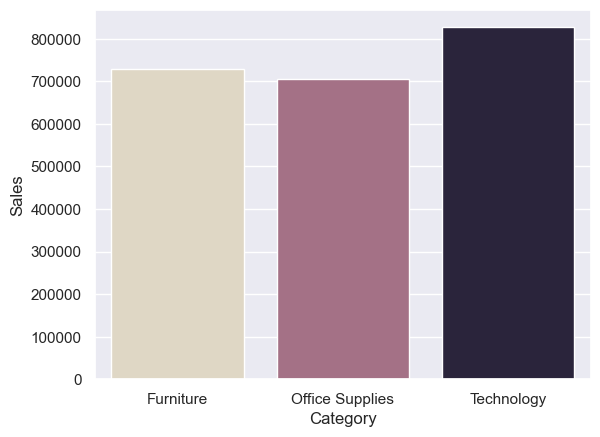

In [15]:
# Sales by Product Category in USA :) 
sns.barplot(data=data,x='Category',y='Sales',palette='ch:s=-.2,r=.6',estimator=np.sum,ci=None)

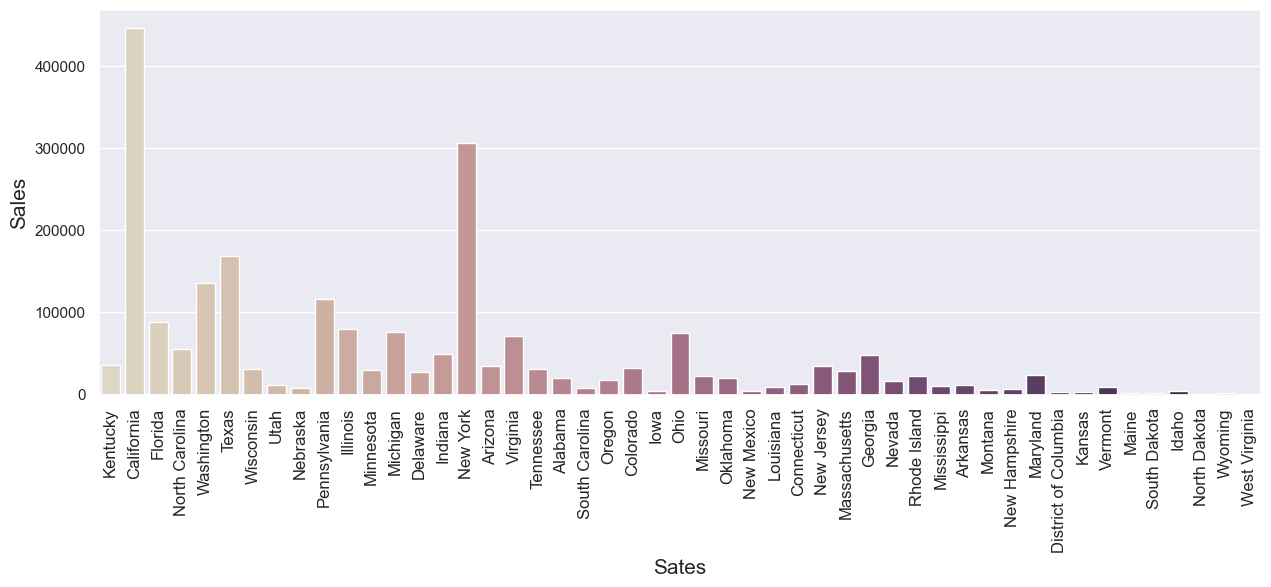

In [16]:
# Sales by Region "State" :) 
plt.figure(figsize=(15,5))
sns.barplot(data=data,y='Sales',x='State',palette="ch:s=-.2,r=.6",ci=None,estimator=np.sum)
plt.xticks(rotation=90,fontsize=12)
plt.ylabel("Sales",fontsize=15)
plt.xlabel("Sates",fontsize=15)
plt.show()

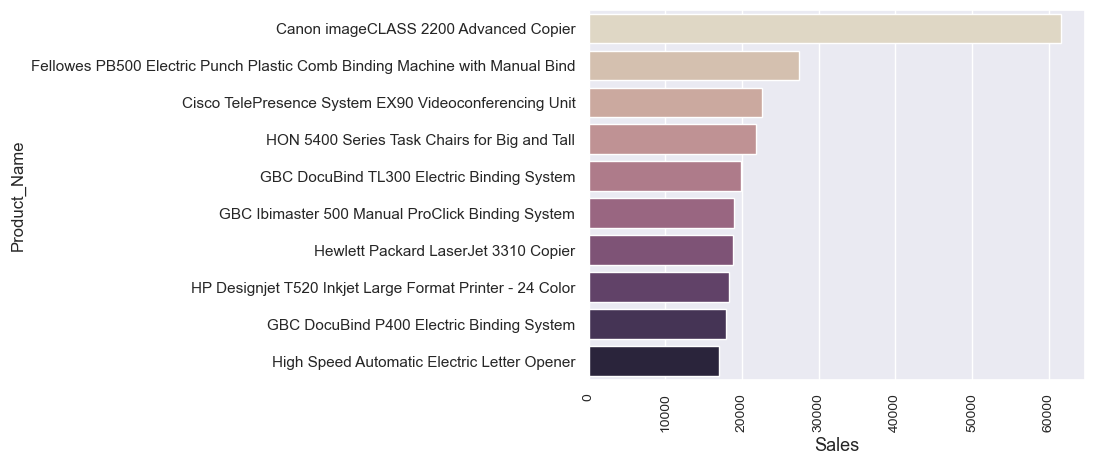

In [17]:
# Viz top 10 Selling Products 
sns.barplot(y='Product_Name',x='Sales',data=top_10_Salling_product,palette='ch:s=-.2,r=.6')
plt.xlabel('Sales',fontsize=13)
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [18]:
# Count each categrical value in "Segment" :) 
data.Segment.value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

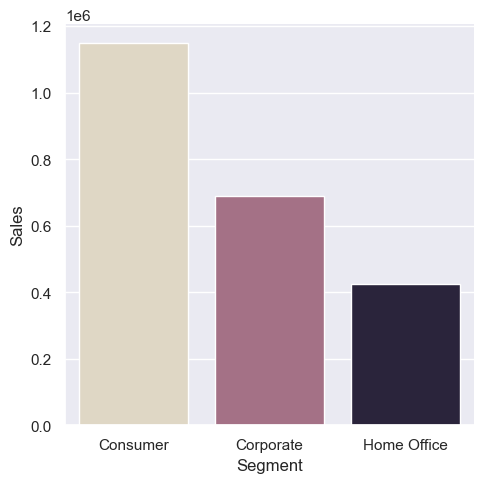

In [19]:
# Sales by Customer Segments :) 
sns.catplot(data=data,x='Segment',y='Sales',kind='bar',palette='ch:s=-.2,r=.6',estimator=np.sum,ci=None)

Time Series Analysis 

In [20]:
# Extract Order_date into Year & Month columns :) 
data['Order_Month'] = data['Order_Date'].dt.month 
data['Order_Year'] = data['Order_Date'].dt.year


In [21]:
# Grouped data by "Order_Year" :) 
order_year_and_Month= data.groupby(['Order_Year','Order_Month'])['Sales'].sum().reset_index()
order_year_and_Month.head(3)

,Order_Year,Order_Month,Sales
0,2015,1,28828.254
1,2015,2,12588.484
2,2015,3,54027.692


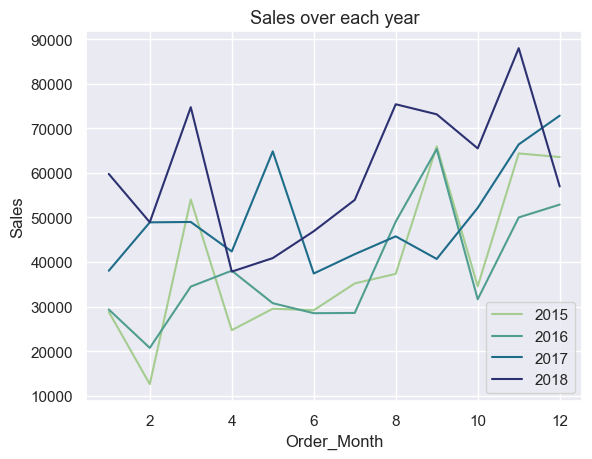

In [22]:
# Analysis sales over each year :) 
sns.lineplot(x='Order_Month',y='Sales',hue='Order_Year',palette="crest",data=order_year_and_Month)
plt.title("Sales over each year",fontsize=13)
plt.legend(loc=0)

Text(0.5, 1.0, 'Sales over Time')

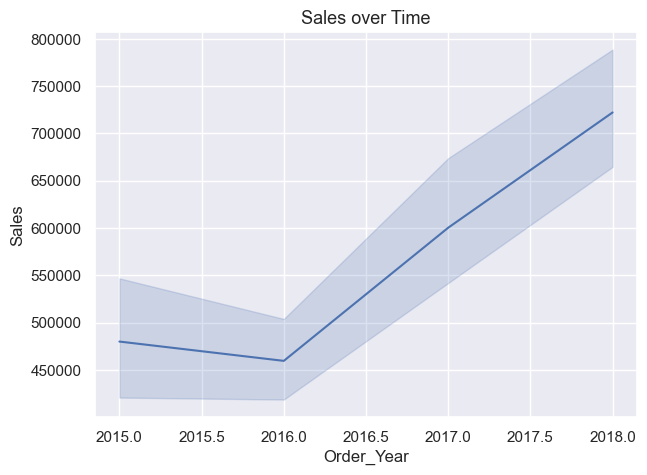

In [23]:
# profit sales "Over Time" :) 
plt.figure(figsize=(7,5))
sns.lineplot(x='Order_Year',y='Sales',data=data,estimator=np.sum)
plt.title("Sales over Time",fontsize=13)